In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, make_scorer
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier
import graphviz
import pickle as pkl

# **Exercício 1** - Treinamento do modelo baseado em árvore de decisão
Neste exercício, você irá treinar um modelo de árvore de decisão utilizando o conjunto de dados MNIST. O objetivo é entender como funciona o processo de treinamento de um modelo de árvore de decisão e como ajustar os parâmetros para melhorar o desempenho do modelo.

Você irá:

Carregar o conjunto de dados MNIST e pré-processar os dados, se necessário.

Dicas:
Certifique-se de que os dados estejam pré-processados corretamente antes de treinar o modelo.
Ajuste os parâmetros do modelo, como a profundidade da árvore, para melhorar o desempenho do modelo.

In [4]:
# Carregar o dataset load_digits (MINST)
digits = load_digits()
print(digits.data.shape)

#Cria os conjuntos X e y
X = digits.data
y = digits.target

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(1797, 64)


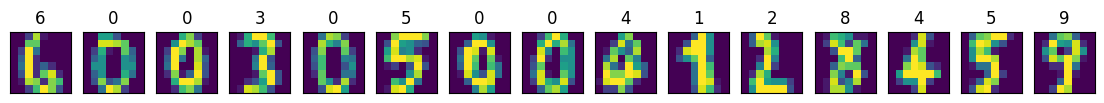

In [5]:
#plota os primeiros samples do conjunto de treinamento
fig, ax = plt.subplots(1, 15, figsize=(14, 14))
for i in range(15):
  #ax[i].matshow(digits.images[i])
  ax[i].matshow(X_train[i].reshape((8, 8)))
  ax[i].set_yticks([])
  ax[i].set_xticks([])
  ax[i].set_title(f"{y_train[i]}")

plt.gray()
plt.show()

Selecionar a biblioteca ou framework que você irá utilizar (por exemplo, Scikit-learn e/ou XGBoost).
Configurar os parâmetros do modelo, como a profundidade da árvore, o número de características a considerar em cada nó, etc.
Treinar o modelo utilizando o conjunto de dados de treinamento.


In [7]:
# Testa varios parametros da Decision Tree usando GridSearchCV
parametros = [{'criterion': ['entropy', 'gini'], 'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'splitter': ['best', 'random'], 'max_features': ['sqrt', 'log2', None]}]

dtree_gscv = GridSearchCV(DecisionTreeClassifier(random_state=42), parametros, cv=5)
dtree_gscv.fit(X_train, y_train)

print(dtree_gscv.best_estimator_)

best_model = dtree_gscv.best_estimator_
# Prever as classes para o conjunto de teste
y_pred = best_model.predict(X_test)
# Imprimir a precisão da Decision Tree
print(f"\n Arvore criada: Precisão: {best_model.score(X_test, y_test):.2%}, Profundidade: {best_model.tree_.max_depth}")

modelo_para_exibir = best_model

DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=42)

 Arvore criada: Precisão: 88.89%, Profundidade: 11


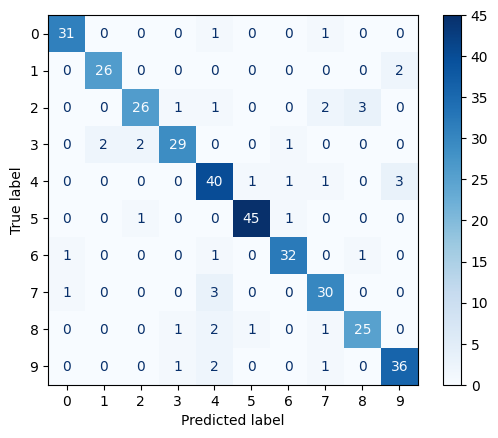

In [8]:
# Plot da confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues, normalize=None)

# **Exercício 2 - Avaliação dos ganhos com a utilização de modelos Ensemble**
Neste exercício, você irá avaliar os ganhos obtidos ao utilizar modelos Ensemble em comparação com o modelo de árvore de decisão simples. Você irá treinar um modelo Ensemble e comparar os resultados com o modelo de árvore de decisão treinado anteriormente.

Dicas:

Utilize diferentes tipos de modelos Ensemble, como Random Forest e XGBoost, para comparar os resultados.

# **Ensemble Paralelo: Random Forest**


In [9]:
# Testa varios parametros da Decision Tree usando GridSearchCV
parametros = [{'n_estimators': [10, 50, 100, 250], 'max_depth': [None, 5, 10, 15], 'max_features': ['sqrt', 'log2', None]}]

dtree_gscv = GridSearchCV(RandomForestClassifier(random_state=42), parametros, cv=5)
dtree_gscv.fit(X_train, y_train)

print(dtree_gscv.best_estimator_)

best_model = dtree_gscv.best_estimator_
# Prever as classes para o conjunto de teste
y_pred = best_model.predict(X_test)
# Imprimir a precisão da Decision Tree
print(f"\n Arvore criada com RandomForest: Precisão: {best_model.score(X_test, y_test):.2%}, Profundidade: {best_model.max_depth}")

modelo_para_exportar = best_model

RandomForestClassifier(max_depth=15, max_features='log2', n_estimators=250,
                       random_state=42)

 Arvore criada com RandomForest: Precisão: 98.06%, Profundidade: 15


# **Ensemble Sequencial: XGBoost e Gradient Boosting**

In [10]:
# Testa varios parametros da Decision Tree usando GridSearchCV
parametros = [{'learning_rate': [0.2, 0.3, 1], 'n_estimators': [20, 100, 200], 'max_depth': [None, 10, 15], 'objective': ['multi:softprob', 'multi:softmax'], 'reg_lambda': [1.0, 5.0]}]

dtree_gscv = GridSearchCV(XGBClassifier(random_state=42, num_class=10, eval_metric='mlogloss'), parametros, cv=5)
dtree_gscv.fit(X_train, y_train)

print(dtree_gscv.best_estimator_)

best_model = dtree_gscv.best_estimator_
# Prever as classes para o conjunto de teste
y_pred = best_model.predict(X_test)
# Imprimir a precisão da Decision Tree
print(f"\n Arvore criada com XGBoost: Precisão: {best_model.score(X_test, y_test):.2%}, Profundidade: {best_model.max_depth}")

In [ ]:
# Testa varios parametros da Decision Tree usando GridSearchCV
parametros = [{'loss': ['log_loss'], 'learning_rate': [0.2, 0.3], 'subsample': [1.0, 0.5], 'n_estimators': [100], 'max_depth': [None]}]

dtree_gscv = GridSearchCV(GradientBoostingClassifier(random_state=42), parametros, cv=5)
dtree_gscv.fit(X_train, y_train)

print(dtree_gscv.best_estimator_)

best_model = dtree_gscv.best_estimator_
# Prever as classes para o conjunto de teste
y_pred = best_model.predict(X_test)
# Imprimir a precisão da Decision Tree
print(f"\n Arvore criada com GradientBoosting: Precisão: {best_model.score(X_test, y_test):.2%}, Profundidade: {best_model.max_depth}")

# Resultados: Melhor performance foi da árvore criada com RandomForest:

# Precisão: 98.06%, Profundidade: 15

# **Exercício 3 - Visualização da árvore de decisão e Medida de Impureza**
Neste exercício, você irá explorar a estrutura da árvore de decisão e entender como a medida de impureza é utilizada para avaliar a qualidade das divisões nos nós da árvore. A medida de impureza é um conceito fundamental em árvores de decisão, pois ajuda a determinar a melhor forma de dividir os dados em subconjuntos menores e mais homogêneos.


Visualizar a árvore de decisão treinada no exercício anterior, utilizando ferramentas como o Scikit-learn ou o Graphviz.

Calcular a medida de impureza para diferentes conjuntos de dados e entender como ela impacta o desempenho do modelo.


Analisar como a medida de impureza afeta a escolha dos atributos para dividir os dados em cada nó da árvore.


Entender como a medida de impureza pode ser utilizada para evitar overfitting e melhorar a generalização do modelo.

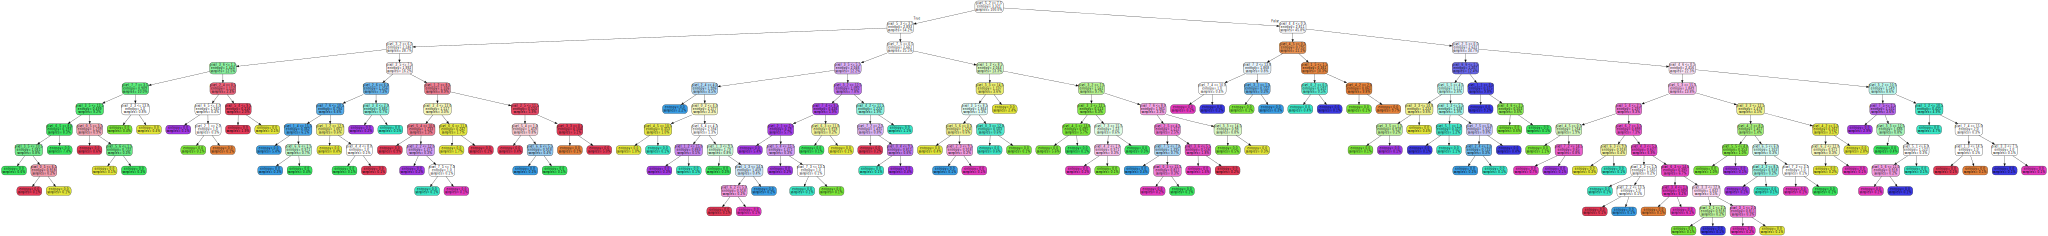

In [108]:
import re

dot_data = tree.export_graphviz(modelo_para_exibir, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("digits")

dot_data = tree.export_graphviz(
    modelo_para_exibir,
    out_file=None,
    feature_names=digits.feature_names,  # Feature names
    class_names=None,  # Do not display class names
    filled=True,  # Fill the nodes with colors
    rounded=True,  # Rounded corners
    special_characters=False, # Special characters in names
    proportion=True
)

# Modify the .dot source to include fontsize attributes
dot_data = dot_data.replace('fontname=', 'fontsize=12, fontname=')

dot_data = re.sub(r'value = \[.*?\]', '', dot_data)  # Remove "value = [...]"

graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Saves as decision_tree.pdf (you can use .png, .jpg, etc.)

# Display inline if in Jupyter
graph

# **Exporta o modelo para ser usado na API**

In [109]:
with open('../models/modelo.pkl', 'wb') as f:
    # Pickle the clf model using the highest protocol available.
    pkl.dump(modelo_para_exportar, f, pkl.HIGHEST_PROTOCOL)

FileNotFoundError: [Errno 2] No such file or directory: '../models/modelo.pkl'